In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, f1_score, accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score
from xgboost import XGBClassifier

In [2]:
X_nt = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv", index_col = 0)
X_t = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv", index_col = 0)
y_nt = X_nt.pop("RECURRENCE")
y_t = X_t.pop("RECURRENCE")

In [3]:
# FIRST I SHALL TEST THE FIRST RUN WITH LEARNING_RATE, N_ESTIMATORS AND MAX_DEPTH WITH DIFFERENT METRICS,
# AND SEE WHICH ONES TAKES ME IN THE RIGHT DIRECTION

In [4]:
X_nt

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_F,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3
141,52,0,0,0,0,0,1,0,0.0,0,...,1,0,0,1,0,1,0,1,0,0
297,61,0,1,0,0,0,0,0,0.0,1,...,0,1,0,1,0,1,0,0,1,0
670,58,0,0,0,0,1,0,0,0.0,0,...,1,0,0,1,0,1,0,0,1,0
364,75,0,1,0,1,0,0,0,0.0,0,...,1,0,0,0,1,1,0,0,1,0
392,17,0,0,0,0,0,1,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,50,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,0,0,1
325,50,0,1,0,0,1,0,0,0.0,0,...,0,1,0,0,1,1,0,1,0,0
608,44,0,0,0,0,1,0,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
664,63,0,0,0,1,0,0,0,0.0,0,...,0,1,0,1,0,1,0,1,0,0


In [2]:
def grid_searcher(param_grid, pipeline, scoring = 'recall', cv = 5, verbose = 1):
    tic = time.time()
    grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, scoring = scoring, n_jobs = -1, verbose = verbose)
    grid_search.fit(X_nt, y_nt)
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    best_model = grid_search.best_estimator_
    toc = time.time()
    print("Time Taken:", toc - tic)
    return best_params, best_model

In [6]:
def model_test(best_model):
    y_pred_test = best_model.predict(X_t)
    report_test = classification_report(y_t, y_pred_test)
    print("Classification Report on Test Set:")
    print(report_test)
    cm = confusion_matrix(y_t, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [7]:
model1 = XGBClassifier(random_state = 42)
imputer1 = SimpleImputer(strategy = 'median')
pipeline1 = Pipeline([
    ('imputer', imputer1),
    ('model', model1)
])

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       183
           1       0.44      0.15      0.23        26

    accuracy                           0.87       209
   macro avg       0.67      0.56      0.58       209
weighted avg       0.83      0.87      0.84       209



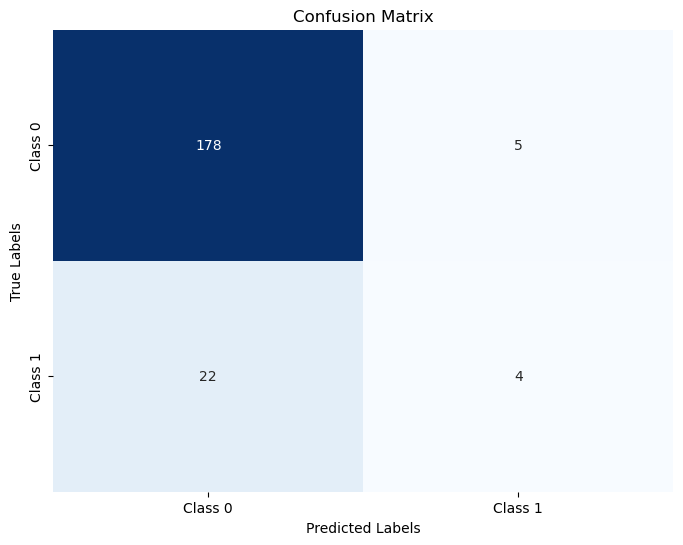

In [8]:
pipeline1.fit(X_nt, y_nt)
model_test(pipeline1)

In [9]:
param_grid1 = {
    'model__learning_rate': np.linspace(0.01, 0.2, 39),
    'model__n_estimators': [50, 75, 100, 125, 150],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [0, 0.5, 1, 1.5]
}

In [10]:
# RECALL-------------------------------------------------------------------------------------------------------------------------------------------------

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.11499999999999999, 'model__max_depth': 4, 'model__n_estimators': 150, 'model__reg_lambda': 1}
Time Taken: 122.33643746376038
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       183
           1       0.57      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.73      0.57      0.59       209
weighted avg       0.85      0.88      0.85       209



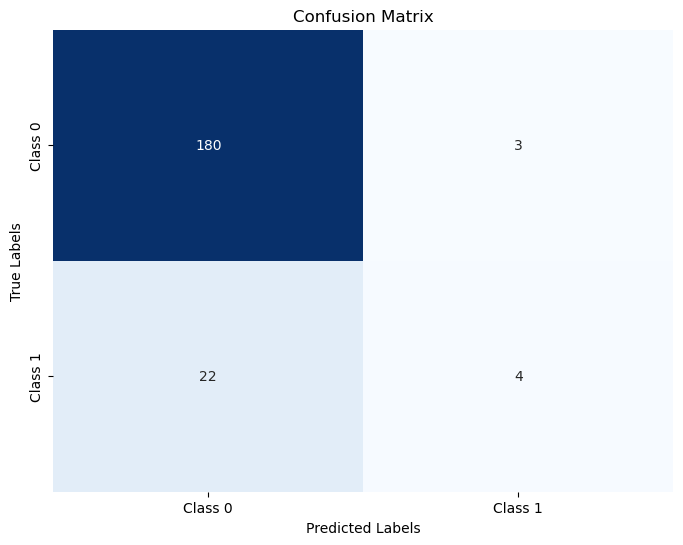

In [11]:
# RECALL
best_params1, best_model1 = grid_searcher(param_grid1, pipeline1)
model_test(best_model1)

Fitting 5 folds for each of 3900 candidates, totalling 19500 fits
Best Hyperparameters: {'model__learning_rate': 0.11499999999999999, 'model__max_depth': 4, 'model__n_estimators': 150, 'model__reg_lambda': 1}
Time Taken: 177.4900414943695
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       183
           1       0.57      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.73      0.57      0.59       209
weighted avg       0.85      0.88      0.85       209



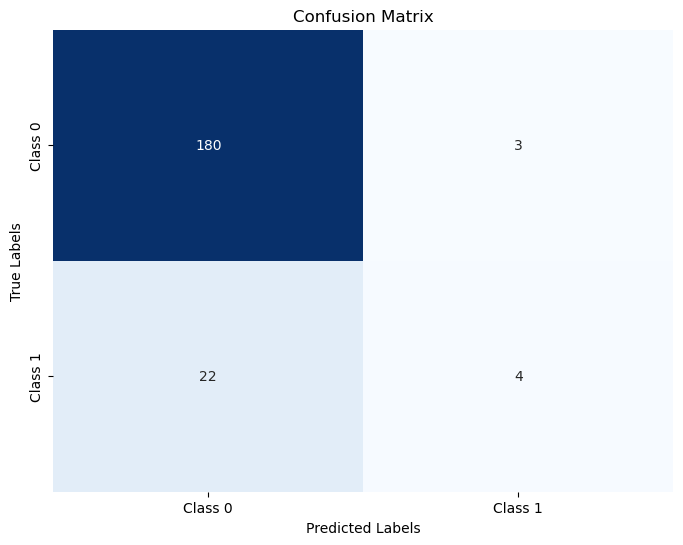

In [12]:
param_grid1a = {
    'model__learning_rate': np.linspace(0.01, 0.2, 39),
    'model__n_estimators': [100, 125, 150, 175, 200],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [0.5, 1, 1.5, 2, 2.5]
}
best_params1a, best_model1a = grid_searcher(param_grid1a, pipeline1)
model_test(best_model1a)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 1.6227495670318604
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       183
           1       0.57      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.73      0.57      0.59       209
weighted avg       0.85      0.88      0.85       209



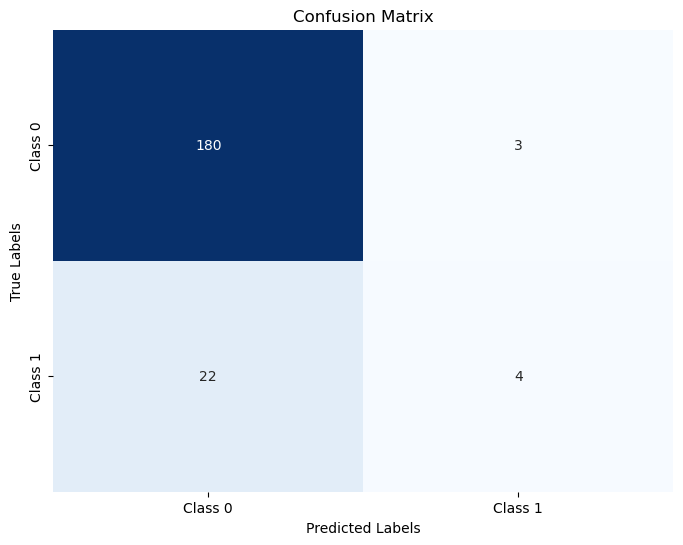

In [13]:
param_grid1b = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5],
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a)
model_test(best_model1b)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 5, 'model__max_delta_step': 0, 'model__min_child_weight': 5, 'model__scale_pos_weight': 5}
Time Taken: 3.1873276233673096
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       183
           1       0.35      0.58      0.43        26

    accuracy                           0.81       209
   macro avg       0.64      0.71      0.66       209
weighted avg       0.86      0.81      0.83       209



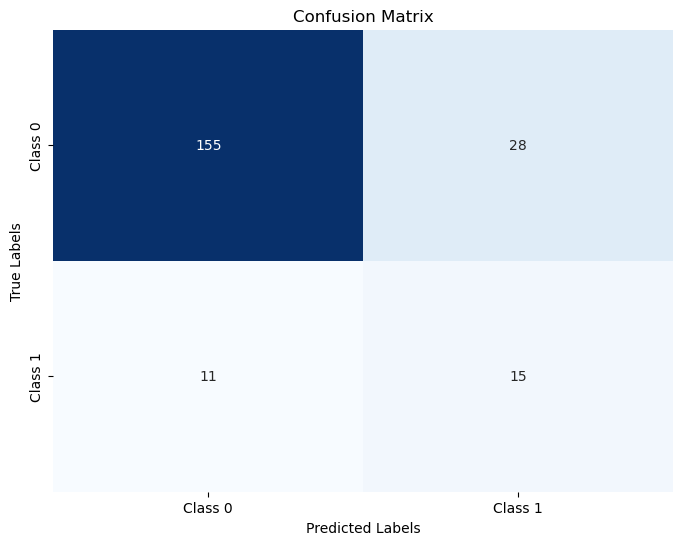

In [14]:
param_grid1c = {
    'model__min_child_weight': [1, 3, 5], # cover
    'model__gamma': [0, 1, 5],
    'model__scale_pos_weight': [1, 3, 5],
    'model__max_delta_step': [0, 1, 2]
}
best_params1c, best_model1c = grid_searcher(param_grid1c, best_model1b)
model_test(best_model1c)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters: {'model__gamma': 4, 'model__max_delta_step': 1, 'model__min_child_weight': 4, 'model__scale_pos_weight': 5}
Time Taken: 6.249034881591797
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       183
           1       0.33      0.58      0.42        26

    accuracy                           0.80       209
   macro avg       0.63      0.71      0.65       209
weighted avg       0.86      0.80      0.82       209



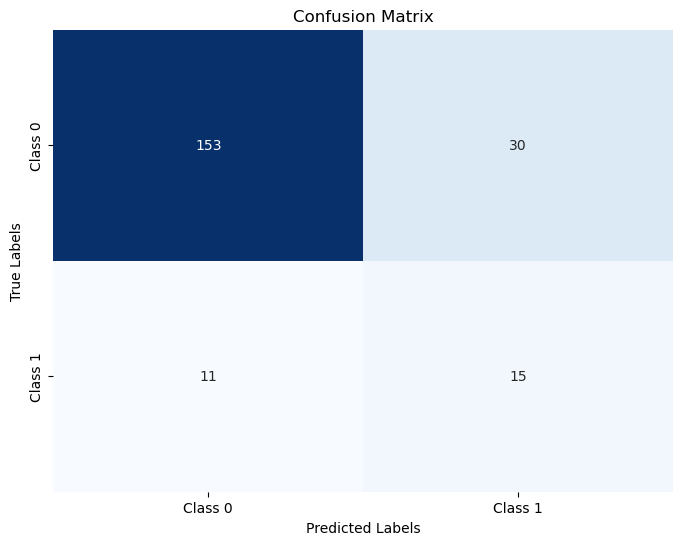

In [15]:
param_grid1d = {
    # 'model__min_child_weight': [3, 4, 5, 6, 7], # cover
    # 'model__gamma': [3, 4, 5, 6, 7],
    # 'model__scale_pos_weight': [3, 4, 5, 6, 7],
    # 'model__max_delta_step': [0, 1, 2]
    'model__min_child_weight': [1, 2, 3, 4], # cover
    'model__gamma': [0, 1, 2, 3, 4],
    'model__scale_pos_weight': [1, 3, 5],
    'model__max_delta_step': [0, 1, 2]
}
best_params1d, best_model1d = grid_searcher(param_grid1d, best_model1c)
model_test(best_model1d)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits
Best Hyperparameters: {'model__gamma': 8, 'model__max_delta_step': 0, 'model__min_child_weight': 8, 'model__scale_pos_weight': 9}
Time Taken: 11.688493013381958
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       183
           1       0.20      0.65      0.31        26

    accuracy                           0.64       209
   macro avg       0.57      0.64      0.53       209
weighted avg       0.84      0.64      0.70       209



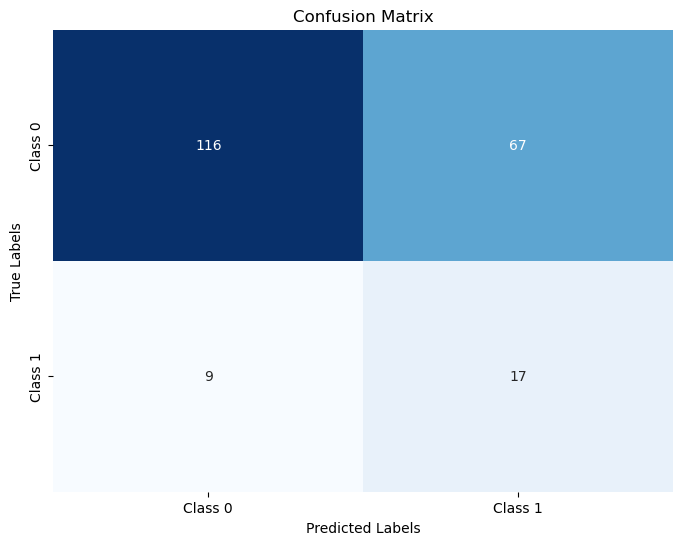

In [16]:
param_grid1e = {
    'model__min_child_weight': [5, 6, 7, 8, 9], # cover
    'model__gamma': [5, 6, 7, 8, 9],
    'model__scale_pos_weight': [5, 6, 7, 8, 9],
    'model__max_delta_step': [0, 1, 2]
}
best_params1e, best_model1e = grid_searcher(param_grid1e, best_model1d)
model_test(best_model1e)

Fitting 5 folds for each of 10125 candidates, totalling 50625 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__gamma': 4, 'model__max_delta_step': 1, 'model__min_child_weight': 4, 'model__reg_alpha': 0, 'model__scale_pos_weight': 5, 'model__subsample': 1.0}
Time Taken: 341.83667826652527
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       183
           1       0.33      0.58      0.42        26

    accuracy                           0.80       209
   macro avg       0.63      0.71      0.65       209
weighted avg       0.86      0.80      0.82       209



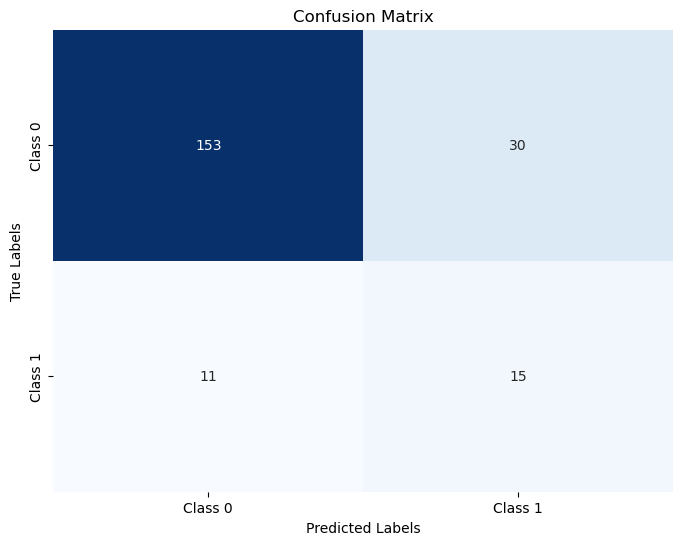

In [17]:
param_grid1f = {
    'model__min_child_weight': [1, 2, 3, 4, 5],
    'model__gamma': [1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2],# , 3, 4],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5],
}
best_params1f, best_model1f = grid_searcher(param_grid1f, best_model1e)
model_test(best_model1f)

Fitting 5 folds for each of 16875 candidates, totalling 84375 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__gamma': 7, 'model__max_delta_step': 0, 'model__min_child_weight': 3, 'model__reg_alpha': 0.5, 'model__scale_pos_weight': 7, 'model__subsample': 1.0}
Time Taken: 544.6653308868408
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       183
           1       0.21      0.58      0.31        26

    accuracy                           0.68       209
   macro avg       0.57      0.64      0.55       209
weighted avg       0.83      0.68      0.73       209



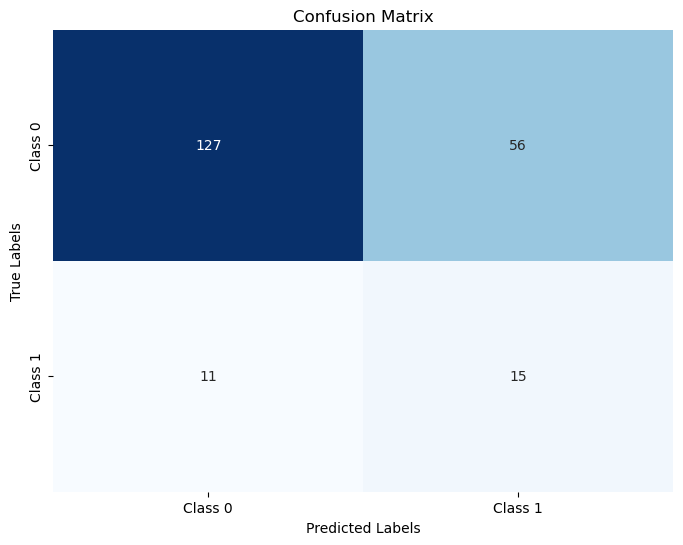

In [18]:
param_grid1g = {
    'model__min_child_weight': [3, 4, 5, 6, 7],
    'model__gamma': [3, 4, 5, 6, 7],
    'model__scale_pos_weight': [3, 4, 5, 6, 7],
    'model__max_delta_step': [0, 1, 2, 3, 4],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.25, 0.5],
}
best_params1g, best_model1g = grid_searcher(param_grid1g, best_model1f)
model_test(best_model1g)

In [19]:
# POSITIVE PERFORMANCE DEGRADES WITH NO IMPROVEMENT IN NEGATIVE PERFORMANCE, NOT A COMPROMISE WORTH MAKING

In [20]:
# PRECISION----------------------------------------------------------------------------------------------------------------------------------------------
# PRECISION IS NOT GOOD ENOUGH

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.095, 'model__max_depth': 4, 'model__n_estimators': 50, 'model__reg_lambda': 0.5}
Time Taken: 107.50920104980469
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       183
           1       0.80      0.15      0.26        26

    accuracy                           0.89       209
   macro avg       0.85      0.57      0.60       209
weighted avg       0.88      0.89      0.86       209



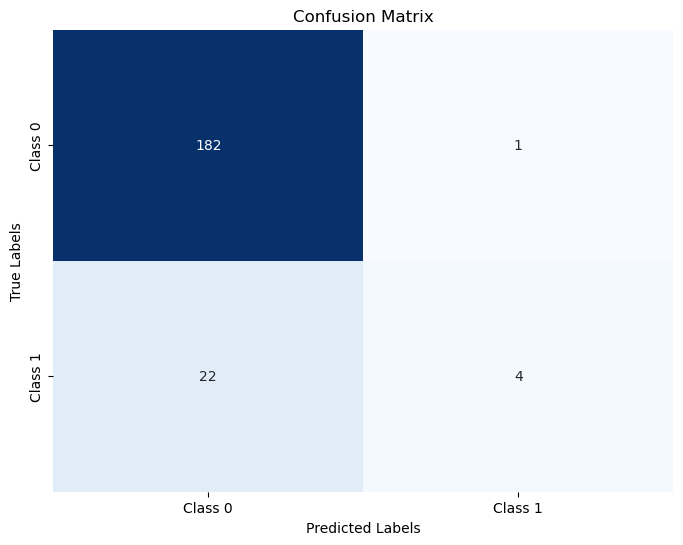

In [21]:
# PRECISION
best_params2, best_model2 = grid_searcher(param_grid1, pipeline1, 'precision')
model_test(best_model2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 0.9269063472747803
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       183
           1       0.80      0.15      0.26        26

    accuracy                           0.89       209
   macro avg       0.85      0.57      0.60       209
weighted avg       0.88      0.89      0.86       209



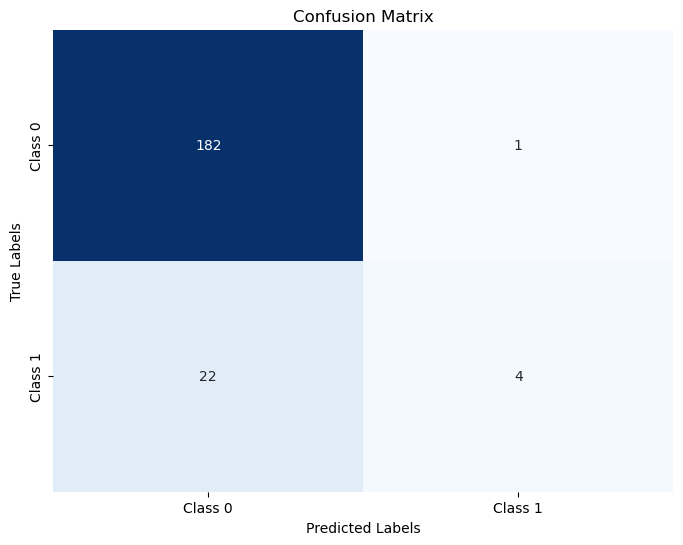

In [22]:
param_grid2a = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5],
}
best_params2a, best_model2a = grid_searcher(param_grid2a, best_model2, 'precision')
model_test(best_model2a)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'model__gamma': 0, 'model__max_delta_step': 0, 'model__min_child_weight': 1, 'model__reg_alpha': 0.75, 'model__scale_pos_weight': 1}
Time Taken: 5.798894643783569
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       183
           1       0.75      0.12      0.20        26

    accuracy                           0.89       209
   macro avg       0.82      0.55      0.57       209
weighted avg       0.87      0.89      0.85       209



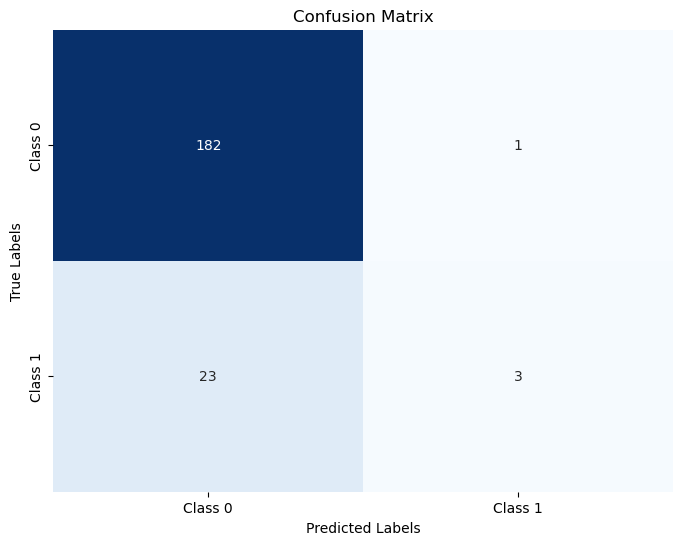

In [23]:
param_grid2b = {
    'model__reg_alpha': [0.25, 0.5, 0.75],
    'model__min_child_weight': [1, 3, 5], # cover
    'model__gamma': [0, 1, 5],
    'model__scale_pos_weight': [1, 2, 5],
    'model__max_delta_step': [0, 1, 2]
}
best_params2b, best_model2b = grid_searcher(param_grid2b, best_model2a, 'precision')
model_test(best_model2b)

In [24]:
# ABANDON PRECISION I THINK, IT SEEMS LIKE A LOST CAUSE

In [25]:
# F1-----------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
# param_grid1 = {
#     'model__learning_rate': np.linspace(0.01, 0.2, 39),
#     'model__n_estimators': [50, 75, 100, 125, 150],
#     'model__max_depth': [3, 4, 5, 6],
#     'model__reg_lambda': [0, 0.5, 1, 1.5]
# }

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.075, 'model__max_depth': 4, 'model__n_estimators': 125, 'model__reg_lambda': 0.5}
Time Taken: 103.27415442466736
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       183
           1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209



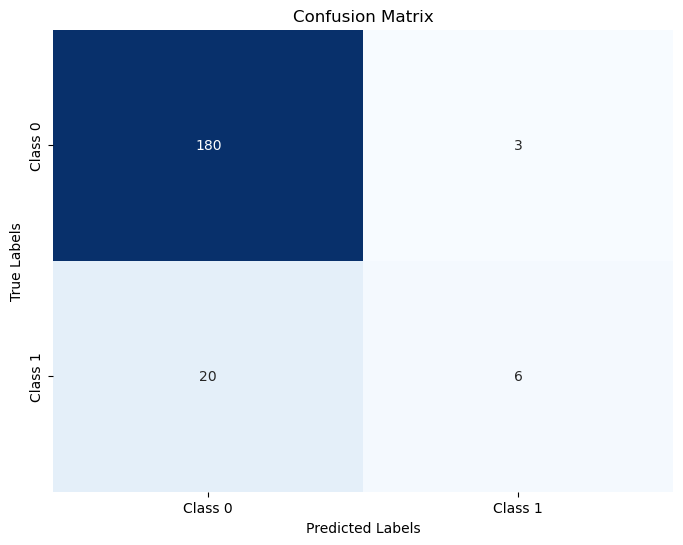

In [27]:
# F1
best_params3, best_model3 = grid_searcher(param_grid1, pipeline1, 'f1')
model_test(best_model3)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 1.3789622783660889
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       183
           1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209



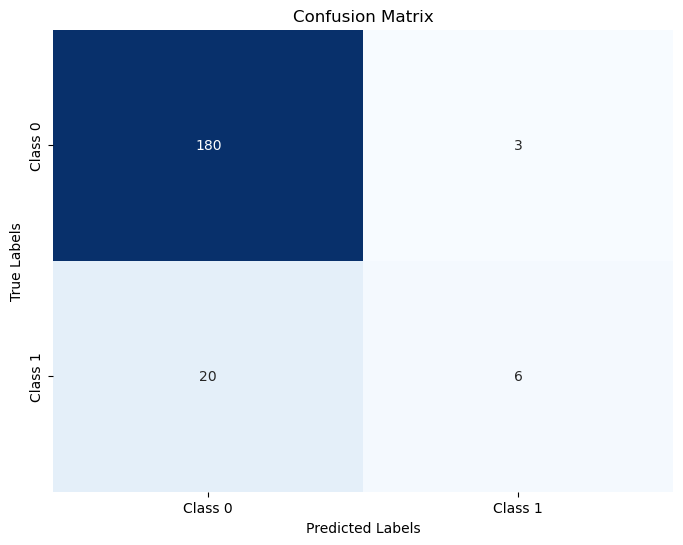

In [28]:
param_grid3a = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5],
}
best_params3a, best_model3a = grid_searcher(param_grid3a, best_model3, 'f1')
model_test(best_model3a)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best Hyperparameters: {'model__gamma': 4, 'model__max_delta_step': 1, 'model__min_child_weight': 4, 'model__scale_pos_weight': 3}
Time Taken: 18.304500102996826
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       183
           1       0.43      0.35      0.38        26

    accuracy                           0.86       209
   macro avg       0.67      0.64      0.65       209
weighted avg       0.85      0.86      0.85       209



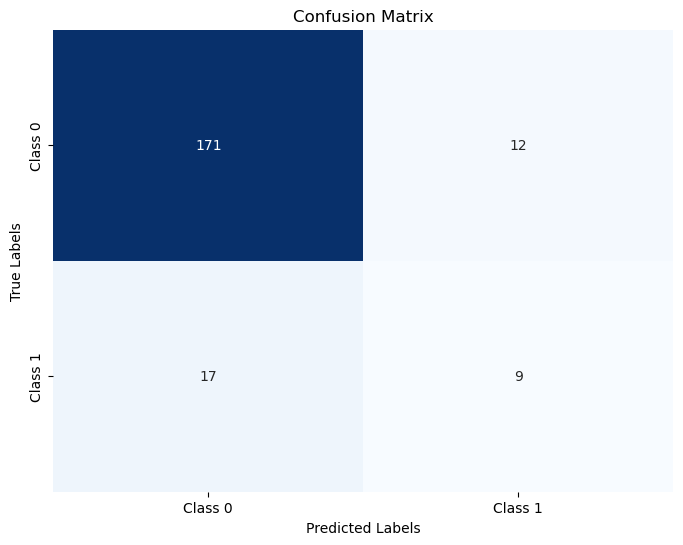

In [29]:
param_grid3b = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params3b, best_model3b = grid_searcher(param_grid3b, best_model3a, 'f1')
model_test(best_model3b)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'model__scale_pos_weight': 15}
Time Taken: 0.7322719097137451
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.58      0.72       183
           1       0.19      0.69      0.30        26

    accuracy                           0.60       209
   macro avg       0.56      0.64      0.51       209
weighted avg       0.84      0.60      0.67       209



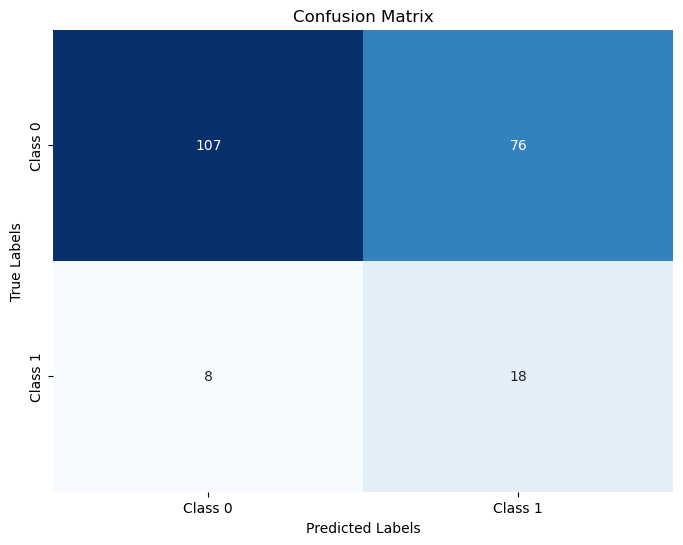

In [30]:
param_grid3c = {
    # 'model__min_child_weight': [3, 4, 5, 6, 7], # cover
    # 'model__gamma': [3, 4, 5, 6, 7],
    'model__scale_pos_weight': [x for x in range(1, 16)],
    # 'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params3c, best_model3c = grid_searcher(param_grid3c, best_model3b)
model_test(best_model3c)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best Hyperparameters: {'model__gamma': 6, 'model__max_delta_step': 1, 'model__min_child_weight': 3, 'model__scale_pos_weight': 7}
Time Taken: 18.544468879699707
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       183
           1       0.21      0.58      0.31        26

    accuracy                           0.68       209
   macro avg       0.57      0.64      0.55       209
weighted avg       0.83      0.68      0.73       209



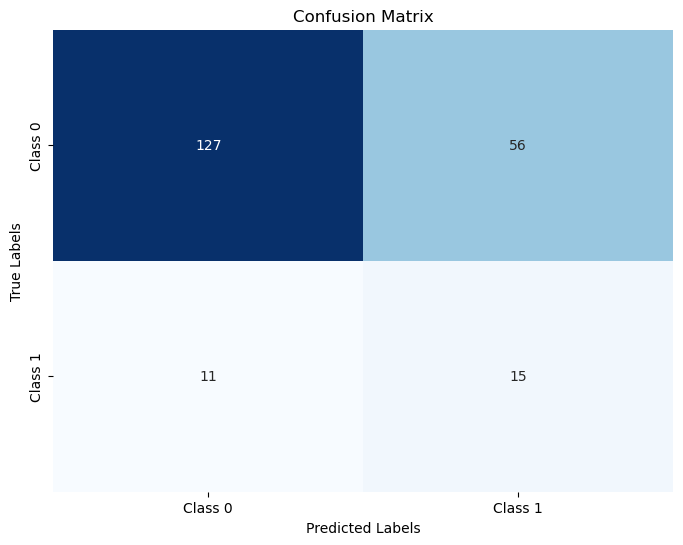

In [31]:
param_grid3c = {
    'model__min_child_weight': [3, 4, 5, 6, 7], # cover
    'model__gamma': [3, 4, 5, 6, 7],
    'model__scale_pos_weight': [3, 4, 5, 6, 7],
    'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params3c, best_model3c = grid_searcher(param_grid3c, best_model3a)
model_test(best_model3c)

In [32]:
# SCALE_POS_WEIGHT IS ONE UNRELIABLE MFKER

In [33]:
X_t

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_F,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3
437,62,0,1,0,1,0,0,0,0.0,0,...,0,1,0,1,0,1,0,0,1,0
442,52,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,1,0,0
420,60,0,0,0,1,0,0,0,0.0,0,...,1,0,0,1,0,1,0,0,1,0
105,40,0,1,1,1,0,0,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
46,38,0,0,0,0,1,0,0,0.0,0,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,20,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,0,1,0
656,43,0,0,0,0,0,1,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
130,32,0,0,0,1,0,0,0,0.0,0,...,1,0,0,1,0,1,0,1,0,0
145,29,0,0,0,0,1,0,0,0.0,0,...,1,0,0,0,1,1,0,0,0,1


Fitting 5 folds for each of 375 candidates, totalling 1875 fits
Best Hyperparameters: {'model__gamma': 9, 'model__max_delta_step': 0, 'model__min_child_weight': 9, 'model__scale_pos_weight': 9}
Time Taken: 10.947989225387573
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       183
           1       0.23      0.73      0.35        26

    accuracy                           0.66       209
   macro avg       0.59      0.69      0.56       209
weighted avg       0.86      0.66      0.72       209



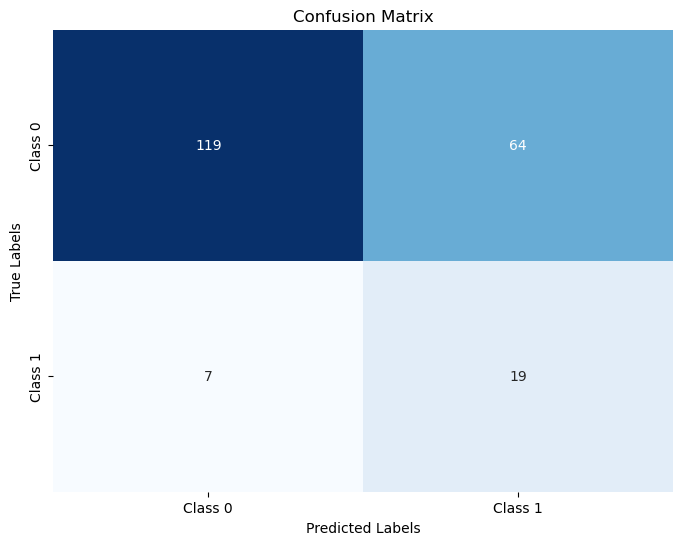

In [34]:
param_grid3c = {
    'model__min_child_weight': [7, 8, 9, 10, 11], # cover
    'model__gamma': [5, 6, 7, 8, 9],
    'model__scale_pos_weight': [5, 6, 7, 8, 9],
    'model__max_delta_step': [0, 1, 2]
}
best_params3c, best_model3c = grid_searcher(param_grid3c, best_model3b)
model_test(best_model3c)

In [35]:
# AVERAGE PRECISION--------------------------------------------------------------------------------------------------------------------------------------

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.065, 'model__max_depth': 4, 'model__n_estimators': 100, 'model__reg_lambda': 0}
Time Taken: 104.12521767616272
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       183
           1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209



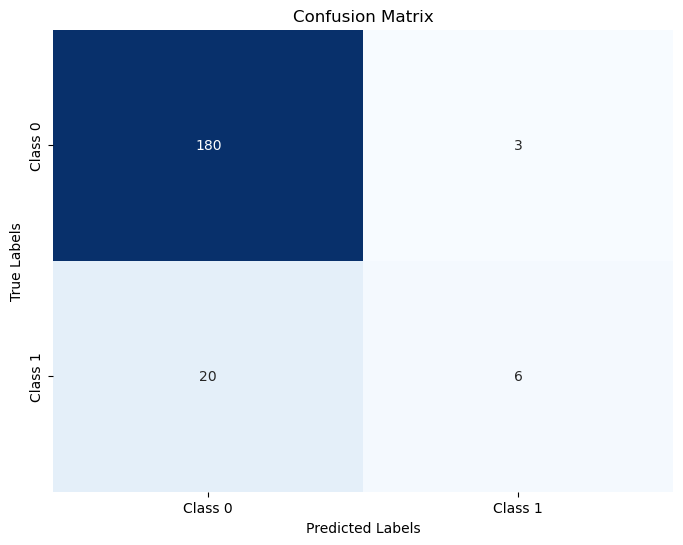

In [36]:
# AVERAGE PRECISION
best_params4, best_model4 = grid_searcher(param_grid1, pipeline1, 'average_precision')
model_test(best_model4)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 2.1787750720977783
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       183
           1       0.67      0.23      0.34        26

    accuracy                           0.89       209
   macro avg       0.78      0.61      0.64       209
weighted avg       0.87      0.89      0.87       209



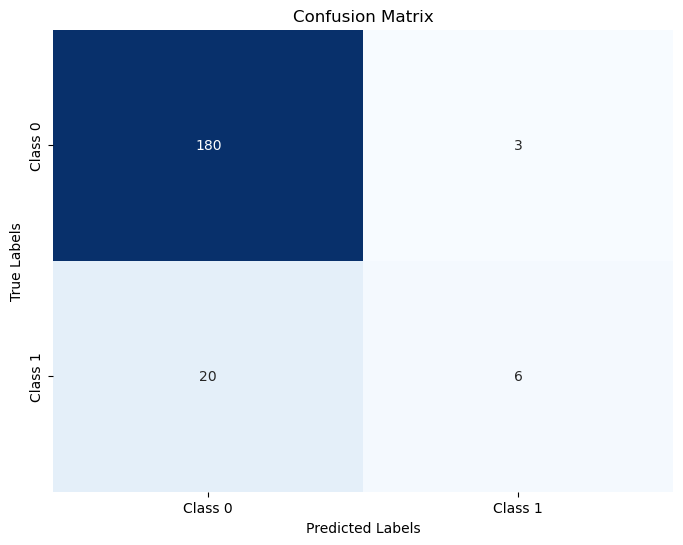

In [37]:
param_grid4a = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
}
best_params4a, best_model4a = grid_searcher(param_grid4a, best_model4, 'average_precision')
model_test(best_model4a)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best Hyperparameters: {'model__gamma': 3, 'model__max_delta_step': 2, 'model__min_child_weight': 3, 'model__scale_pos_weight': 3}
Time Taken: 16.803110599517822
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       183
           1       0.48      0.50      0.49        26

    accuracy                           0.87       209
   macro avg       0.71      0.71      0.71       209
weighted avg       0.87      0.87      0.87       209



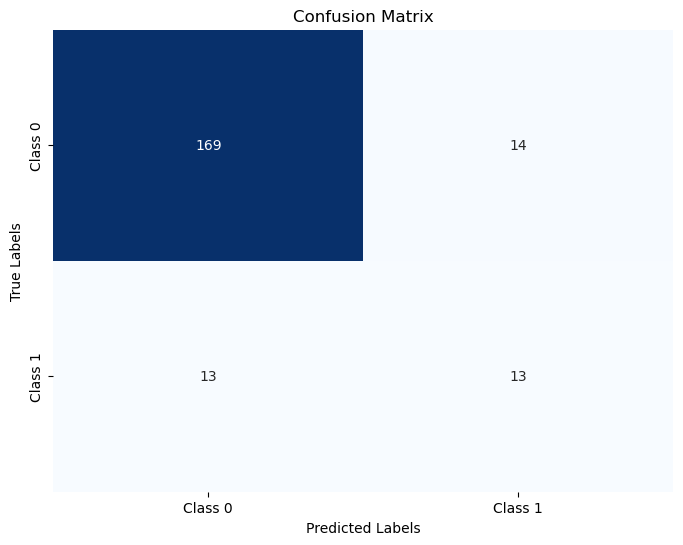

In [38]:
param_grid4b = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params4b, best_model4b = grid_searcher(param_grid4b, best_model4a, 'average_precision')
model_test(best_model4b)

Fitting 5 folds for each of 8208 candidates, totalling 41040 fits
Best Hyperparameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.07500000000000001, 'model__max_depth': 3, 'model__n_estimators': 75, 'model__reg_lambda': 0, 'model__subsample': 1.0}
Time Taken: 253.5405855178833
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       183
           1       0.86      0.23      0.36        26

    accuracy                           0.90       209
   macro avg       0.88      0.61      0.65       209
weighted avg       0.90      0.90      0.87       209



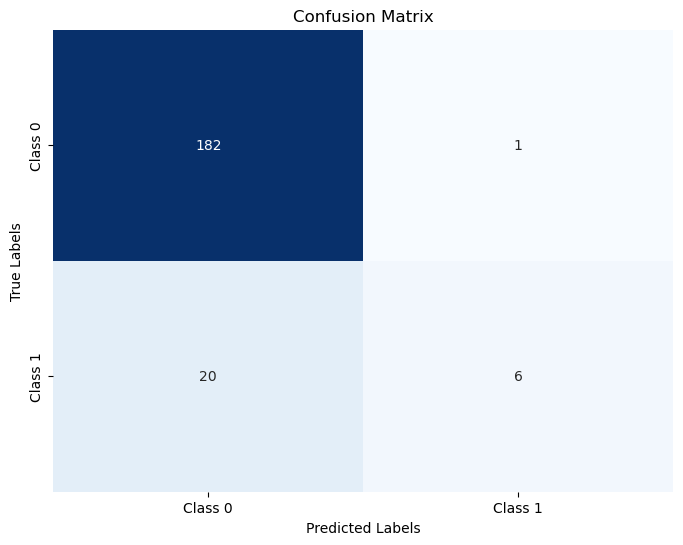

In [39]:
param_grid4c = {
    'model__learning_rate': np.linspace(0.01, 0.1, 19),
    'model__n_estimators': [75, 100, 125],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [0, 0.5, 1, 1.5],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    # 'model__reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    # 'model__gamma': [1, 2, 3, 4, 5],
    # 'model__scale_pos_weight': [1, 2, 3, 4, 5],
    # 'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params4c, best_model4c = grid_searcher(param_grid4c, pipeline1, 'average_precision')
model_test(best_model4c)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits
Best Hyperparameters: {'model__gamma': 1, 'model__max_delta_step': 0, 'model__min_child_weight': 2, 'model__reg_alpha': 0.2, 'model__scale_pos_weight': 3}
Time Taken: 62.15229034423828
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       183
           1       0.50      0.46      0.48        26

    accuracy                           0.88       209
   macro avg       0.71      0.70      0.70       209
weighted avg       0.87      0.88      0.87       209



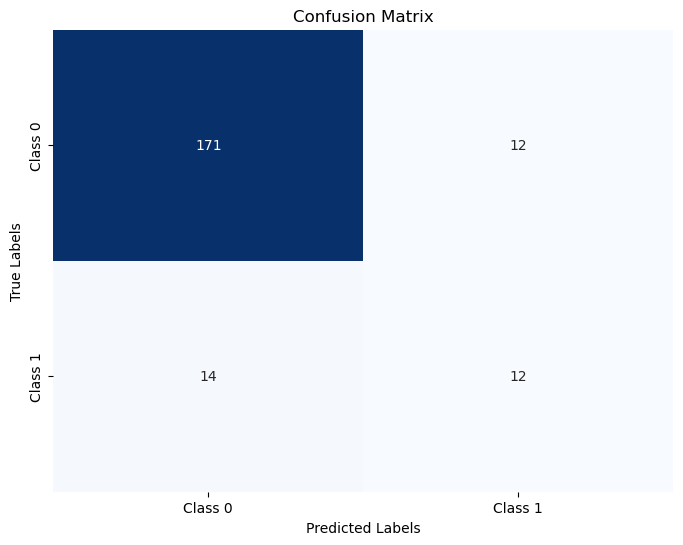

In [40]:
param_grid4d = {
    'model__reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params4d, best_model4d = grid_searcher(param_grid4d, best_model4c, 'average_precision')
model_test(best_model4d)

In [41]:
# LOOKING KINDA GOOD

In [42]:
# ROC_AUC------------------------------------------------------------------------------------------------------------------------------------------------

In [43]:
bad_list = []
ok_list = []
for col in X_nt.columns:
    if X_nt[col].nunique() != X_t[col].nunique():
        bad_list.append(col)
    # elif X_nt[col].unique() != X_t[col].unique():
    #     bad_list.append(col)

In [44]:
bad_list

['AGE', 'MAX DIA', 'MONTHS', 'HISTOPATHOLOGY_CC', 'HISTOPATHOLOGY_PAP']

In [45]:
print(X_nt['HISTOPATHOLOGY_CC'].value_counts())
print(X_t['HISTOPATHOLOGY_CC'].value_counts())
print(X_nt['HISTOPATHOLOGY_PAP'].value_counts())
print(X_t['HISTOPATHOLOGY_PAP'].value_counts())

HISTOPATHOLOGY_CC
1    481
0      4
Name: count, dtype: int64
HISTOPATHOLOGY_CC
1    209
Name: count, dtype: int64
HISTOPATHOLOGY_PAP
0    481
1      4
Name: count, dtype: int64
HISTOPATHOLOGY_PAP
0    209
Name: count, dtype: int64


Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 50, 'model__reg_lambda': 0}
Time Taken: 80.26713299751282
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       183
           1       0.00      0.00      0.00        26

    accuracy                           0.88       209
   macro avg       0.44      0.50      0.47       209
weighted avg       0.77      0.88      0.82       209



C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


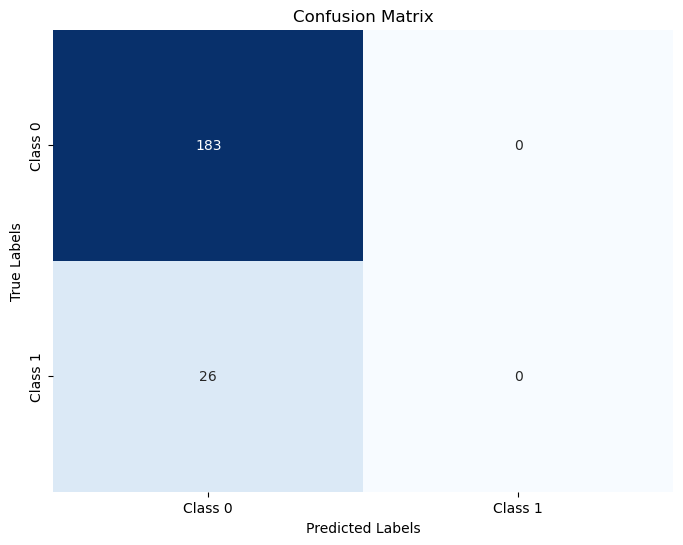

In [46]:
# ROC_AUC
best_params5, best_model5 = grid_searcher(param_grid1, pipeline1, 'roc_auc')
model_test(best_model5)

In [47]:
# BALANCED ACCURACY--------------------------------------------------------------------------------------------------------------------------------------

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.065, 'model__max_depth': 4, 'model__n_estimators': 150, 'model__reg_lambda': 0}
Time Taken: 76.67896008491516
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       183
           1       0.62      0.19      0.29        26

    accuracy                           0.89       209
   macro avg       0.76      0.59      0.62       209
weighted avg       0.86      0.89      0.86       209



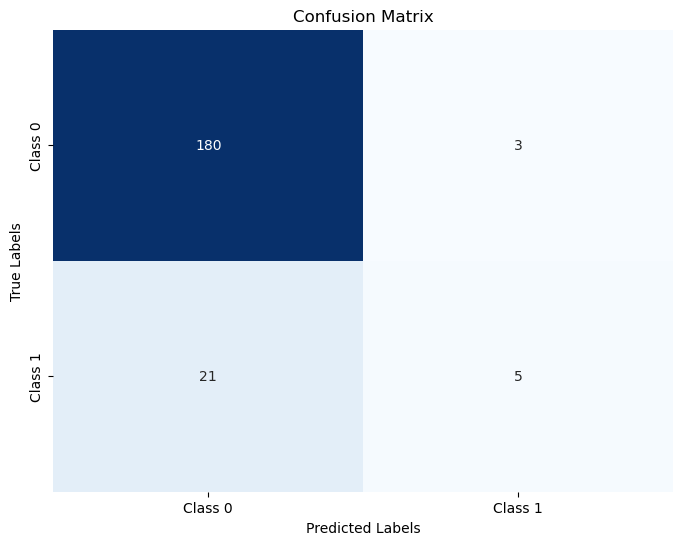

In [48]:
# BALANCED ACCURACY
best_params6, best_model6 = grid_searcher(param_grid1, pipeline1, 'balanced_accuracy')
model_test(best_model6)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 1.063258409500122
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       183
           1       0.62      0.19      0.29        26

    accuracy                           0.89       209
   macro avg       0.76      0.59      0.62       209
weighted avg       0.86      0.89      0.86       209



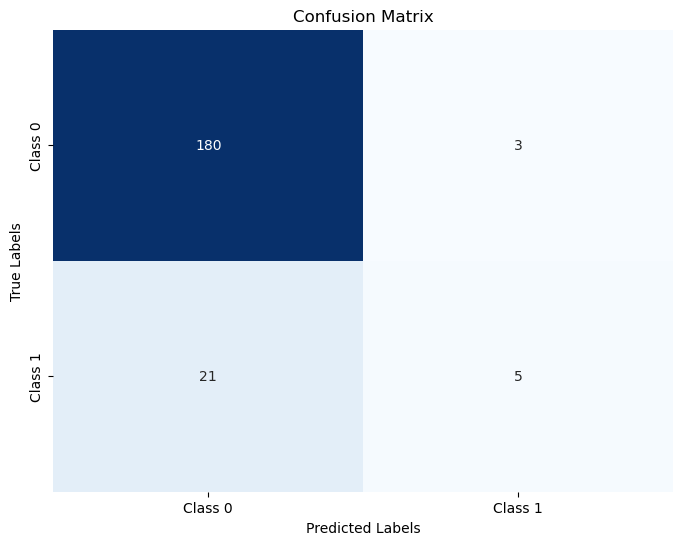

In [49]:
param_grid6a = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5],
}
best_params6a, best_model6a = grid_searcher(param_grid6a, best_model6, 'balanced_accuracy')
model_test(best_model6a)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best Hyperparameters: {'model__gamma': 4, 'model__max_delta_step': 2, 'model__min_child_weight': 4, 'model__scale_pos_weight': 5}
Time Taken: 14.11979341506958
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       183
           1       0.33      0.58      0.42        26

    accuracy                           0.80       209
   macro avg       0.63      0.70      0.65       209
weighted avg       0.86      0.80      0.82       209



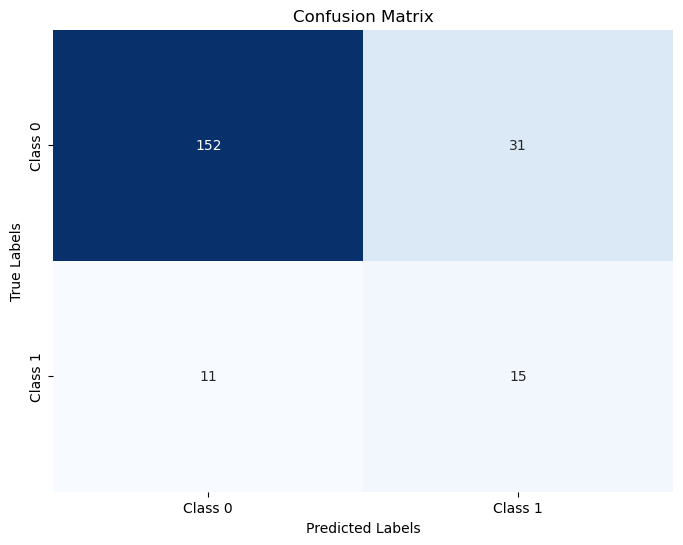

In [50]:
param_grid6b = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params6b, best_model6b = grid_searcher(param_grid6b, best_model6a, 'balanced_accuracy')
model_test(best_model6b)

In [51]:
# MATTHEWS CORRELATION COEFFICIENT-----------------------------------------------------------------------------------------------------------------------

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.06999999999999999, 'model__max_depth': 4, 'model__n_estimators': 100, 'model__reg_lambda': 0}
Time Taken: 79.55944156646729
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



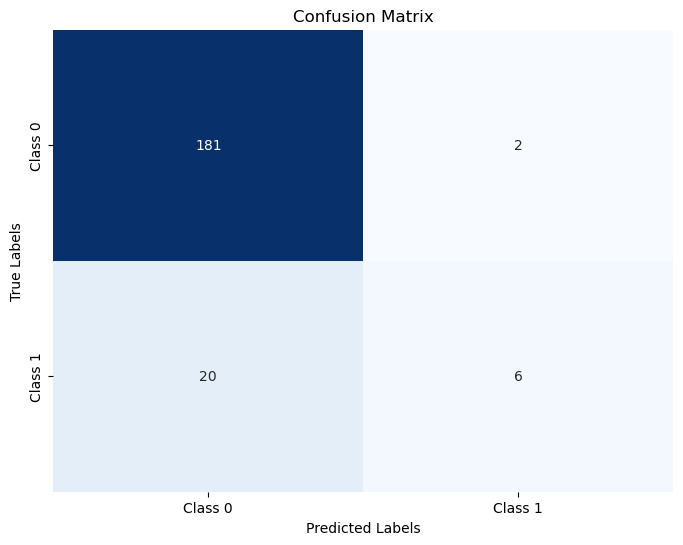

In [52]:
# MATTHEWS CORRELATION COEFFICIENT
best_params7, best_model7 = grid_searcher(param_grid1, pipeline1, 'matthews_corrcoef')
model_test(best_model7)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 0.862722635269165
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



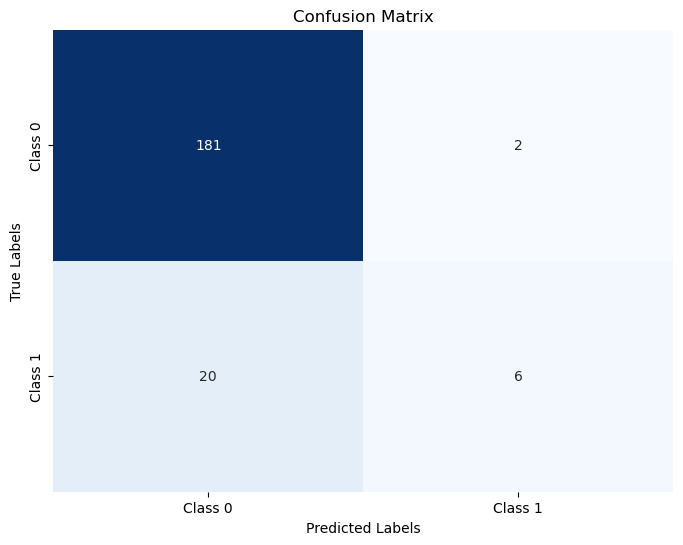

In [53]:
param_grid7a = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5],
}
best_params7a, best_model7a = grid_searcher(param_grid7a, best_model7, 'matthews_corrcoef')
model_test(best_model7a)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best Hyperparameters: {'model__gamma': 1, 'model__max_delta_step': 2, 'model__min_child_weight': 3, 'model__scale_pos_weight': 2}
Time Taken: 12.643167734146118
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       183
           1       0.56      0.35      0.43        26

    accuracy                           0.89       209
   macro avg       0.74      0.65      0.68       209
weighted avg       0.87      0.89      0.87       209



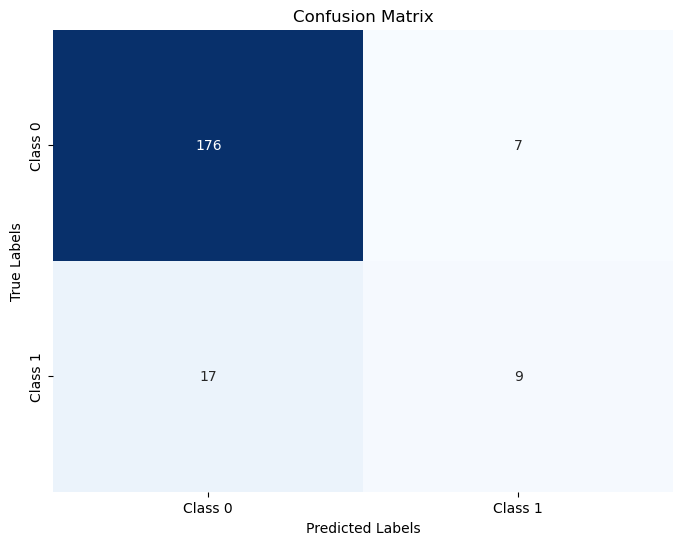

In [54]:
param_grid7b = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params7b, best_model7b = grid_searcher(param_grid7b, best_model7a, 'matthews_corrcoef')
model_test(best_model7b)

Fitting 5 folds for each of 8208 candidates, totalling 41040 fits
Best Hyperparameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.065, 'model__max_depth': 3, 'model__n_estimators': 125, 'model__reg_lambda': 0, 'model__subsample': 1.0}
Time Taken: 309.2919387817383
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       183
           1       0.86      0.23      0.36        26

    accuracy                           0.90       209
   macro avg       0.88      0.61      0.65       209
weighted avg       0.90      0.90      0.87       209



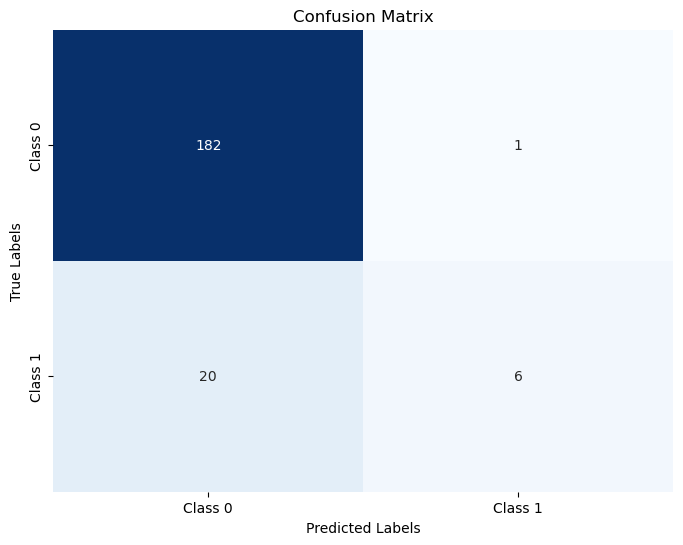

In [73]:
param_grid7c = {
    'model__learning_rate': np.linspace(0.01, 0.1, 19),
    'model__n_estimators': [75, 100, 125],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [0, 0.5, 1, 1.5],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    # 'model__reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    # 'model__gamma': [1, 2, 3, 4, 5],
    # 'model__scale_pos_weight': [1, 2, 3, 4, 5],
    # 'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params7c, best_model7c = grid_searcher(param_grid7c, pipeline1, 'matthews_corrcoef')
model_test(best_model7c)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Hyperparameters: {'model__colsample_bytree': 0.9, 'model__learning_rate': 0.07, 'model__max_depth': 4, 'model__n_estimators': 120, 'model__reg_lambda': 1.5, 'model__subsample': 1.0}
Time Taken: 28.08907389640808
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.71      0.19      0.30        26

    accuracy                           0.89       209
   macro avg       0.81      0.59      0.62       209
weighted avg       0.87      0.89      0.86       209



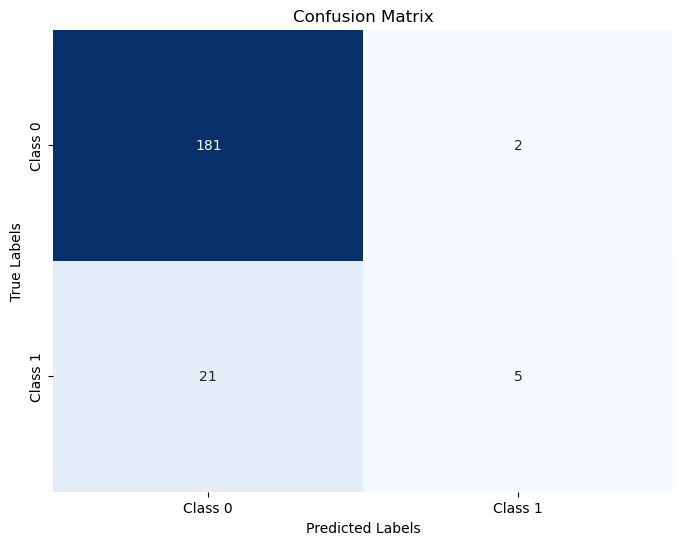

In [75]:
param_grid7d = {
    'model__learning_rate': [0.07],
    'model__n_estimators': [110, 115, 120, 125, 130],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [0.5, 1, 1.5, 2],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 0.9],
    # 'model__reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    # 'model__gamma': [1, 2, 3, 4, 5],
    # 'model__scale_pos_weight': [1, 2, 3, 4, 5],
    # 'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params7d, best_model7d = grid_searcher(param_grid7d, best_model7c, 'matthews_corrcoef')
model_test(best_model7d)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best Hyperparameters: {'model__gamma': 1, 'model__max_delta_step': 1, 'model__min_child_weight': 1, 'model__scale_pos_weight': 2}
Time Taken: 12.50606632232666
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       183
           1       0.60      0.35      0.44        26

    accuracy                           0.89       209
   macro avg       0.76      0.66      0.69       209
weighted avg       0.87      0.89      0.88       209



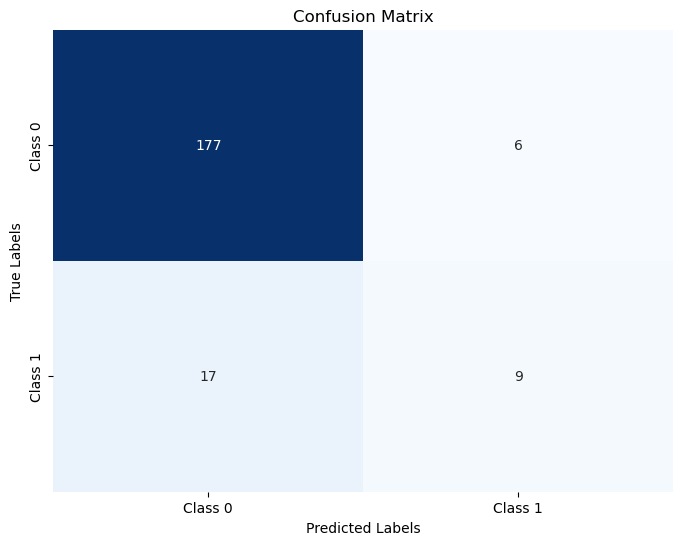

In [57]:
param_grid7e = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4]
}
best_params7e, best_model7e = grid_searcher(param_grid7e, best_model7d, 'matthews_corrcoef')
model_test(best_model7e)

In [68]:
X_nt['RECURRENCE'] = y_nt
X_t['RECURRENCE'] = y_t
X = pd.concat([X_nt, X_t])
y = X.pop('RECURRENCE')
X_nt.pop('RECURRENCE')
X_t.pop('RECURRENCE')

437    0
442    0
420    0
105    0
46     0
      ..
502    0
656    0
130    0
145    0
92     0
Name: RECURRENCE, Length: 209, dtype: int64

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       607
           1       0.57      0.57      0.57        87

    accuracy                           0.89       694
   macro avg       0.75      0.76      0.75       694
weighted avg       0.89      0.89      0.89       694



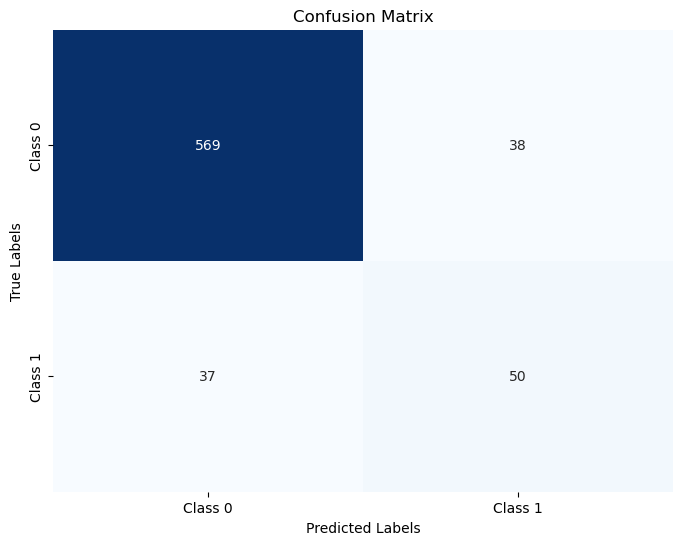

In [69]:
y_pred = best_model4d.predict(X)
report = classification_report(y, y_pred)
print("Classification Report on Test Set:")
print(report)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       607
           1       0.74      0.48      0.58        87

    accuracy                           0.91       694
   macro avg       0.83      0.73      0.77       694
weighted avg       0.91      0.91      0.91       694



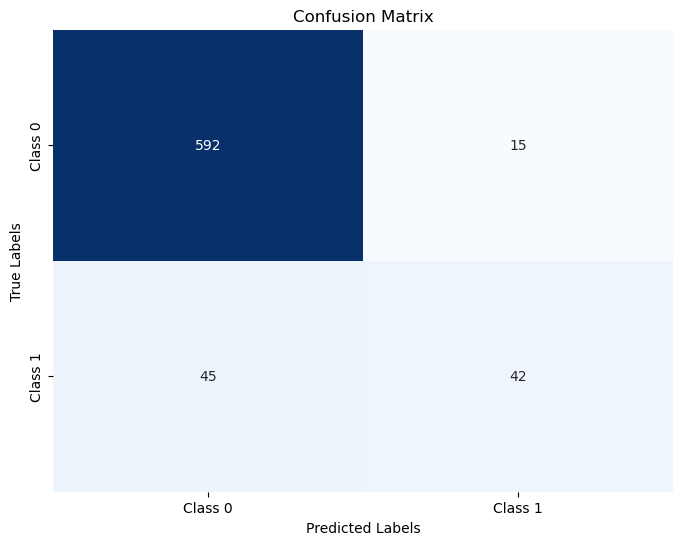

In [70]:
y_pred = best_model7e.predict(X)
report = classification_report(y, y_pred)
print("Classification Report on Test Set:")
print(report)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [61]:
# JACCARD------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# JACCARD
best_params8, best_model8 = grid_searcher(param_grid1, pipeline1, 'jaccard')
model_test(best_model8)

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits


In [ ]:
y_pred = best_model8.predict(X)
report = classification_report(y, y_pred)
print("Classification Report on Test Set:")
print(report)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
X_nt

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3,RECURRENCE
141,52,0,0,0,0,0,1,0,0.0,0,...,0,0,1,0,1,0,1,0,0,0
297,61,0,1,0,0,0,0,0,0.0,1,...,1,0,1,0,1,0,0,1,0,1
670,58,0,0,0,0,1,0,0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
364,75,0,1,0,1,0,0,0,0.0,0,...,0,0,0,1,1,0,0,1,0,0
392,17,0,0,0,0,0,1,0,0.0,0,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,50,0,0,0,0,1,0,0,0.0,0,...,1,0,1,0,1,0,0,0,1,0
325,50,0,1,0,0,1,0,0,0.0,0,...,1,0,0,1,1,0,1,0,0,0
608,44,0,0,0,0,1,0,0,0.0,0,...,1,0,0,1,1,0,0,1,0,0
664,63,0,0,0,1,0,0,0,0.0,0,...,1,0,1,0,1,0,1,0,0,0


In [64]:
for col in X_nt.columns:
    print(col)

AGE
DM
HTN
CKD
INCIDENTAL
PAIN
HEMATURIA
MASS
LOW
FEVER
T
N
M
IVC INV
MAX DIA
GRADE
MONTHS
SEX_F
SEX_M
SITE_BL
SITE_LEFT
SITE_RIGHT
HISTOPATHOLOGY_CC
HISTOPATHOLOGY_PAP
APPROACH_1
APPROACH_2
APPROACH_3
RECURRENCE
